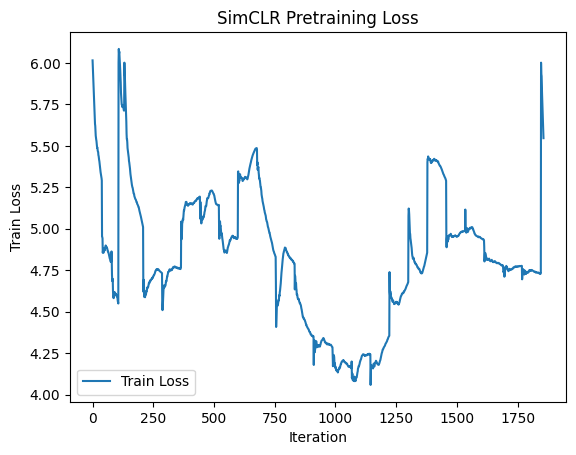

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train_loss.txt', header=None, names=['epoch', 'it', 'train_loss', 'cosine_sim'])

plt.plot(df.index, df['train_loss'], label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('SimCLR Pretraining Loss')
plt.legend()
plt.show()

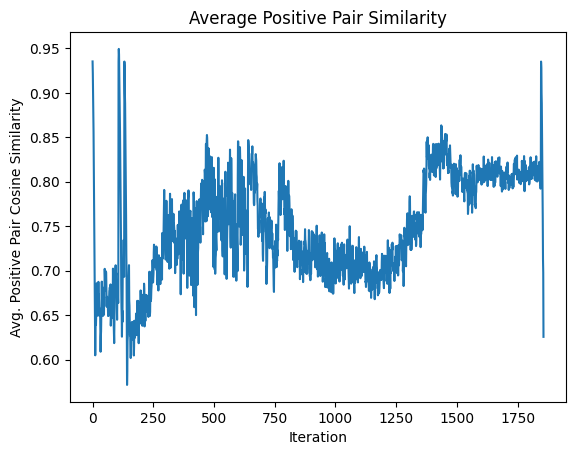

In [56]:
plt.plot(df.index, df['cosine_sim'])
plt.xlabel('Iteration')
plt.ylabel('Avg. Positive Pair Cosine Similarity')
plt.title('Average Positive Pair Similarity')
plt.show()

In [14]:
import sys
sys.path.append('..')

from model import *

model = UNet_Encoder()
print(model)

UNet_Encoder(
  (conv0): MinkowskiConvolution(in=1, out=32, kernel_size=[5, 5, 5], stride=[1, 1, 1], dilation=[1, 1, 1])
  (bn0): MinkowskiBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1): MinkowskiConvolution(in=32, out=32, kernel_size=[2, 2, 2], stride=[2, 2, 2], dilation=[1, 1, 1])
  (bn1): MinkowskiBatchNorm(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): ResidualBlock(
    (conv1): MinkowskiConvolution(in=32, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
    (bn1): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): MinkowskiConvolution(in=64, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
    (bn2): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): MinkowskiConvolution(in=32, out=64, kernel_size=[1, 1, 1], stride=[1, 1, 1], dilation=[1, 1, 1])
  )
  (conv2): Minkow

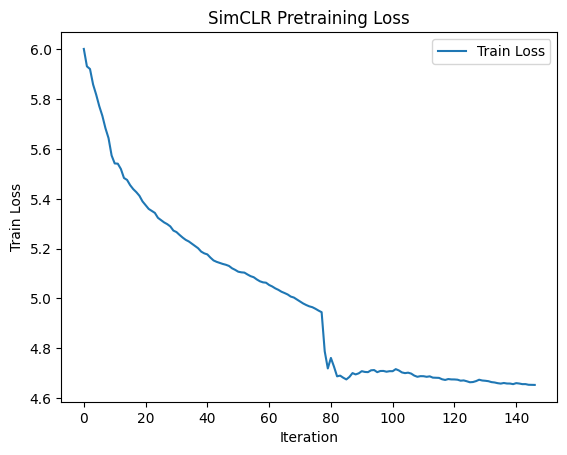

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('train_loss_no_norm.txt', header=None, names=['epoch', 'it', 'train_loss', 'cosine_sim'])

plt.plot(df.index, df['train_loss'], label='Train Loss')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('SimCLR Pretraining Loss')
plt.legend()
plt.show()

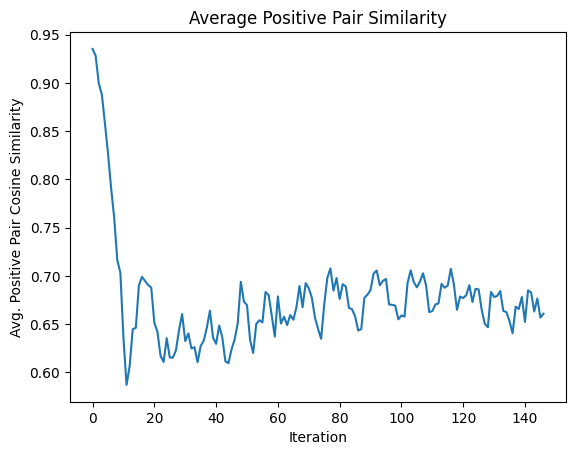

In [58]:
plt.plot(df.index, df['cosine_sim'])
plt.xlabel('Iteration')
plt.ylabel('Avg. Positive Pair Cosine Similarity')
plt.title('Average Positive Pair Similarity')
plt.show()